In [4]:
pip install pyLDAvis


     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=3b985bd6d1686851fba3239916594c8f411e29b8d25e2d827258df97b635fa50
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [5]:
import numpy as np
import pandas as pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from gensim.matutils import corpus2csc


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [6]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [7]:
url = 'https://drive.google.com/file/d/1NmGTSp5CLiCTPlQgP614TvNNv1TXDewU/view?usp=sharin'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

In [8]:
for i in range(len(data.index)):
   data['segment'][i] = data['segment'][i].split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#data = data.loc[400:1400]

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data.head()

,segment,label
0,"[act, known, circumst, harm, may, accept, gene...",a
1,"[aris, whether, represent, part, contract, If,...",a
2,"[section, cite, godbolt, see, F., N., B, G, fi...",a
3,"[row, bell, c.c, see, treasur, hidden, anoth, ...",a
4,"[give, trespass, pretti, nearli, thing, action...",a


In [11]:
data_lemmatized = data['segment'].tolist()
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 3), (34, 1), (35, 1), (36, 2), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 3), (53, 2), (54, 1), (55, 5), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 2), (72, 3), (73, 1), (74, 1), (75, 4), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 2), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1)]]


In [12]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('AT', 1),
  ('It', 1),
  ('On', 1),
  ('So', 1),
  ('V.', 1),
  ('accept', 1),
  ('act', 5),
  ('ad', 1),
  ('address', 1),
  ('adopt', 1),
  ('also', 1),
  ('alway', 2),
  ('and', 2),
  ('answer', 1),
  ('arguabl', 1),
  ('ascertain', 1),
  ('averag', 1),
  ('avoid', 2),
  ('baile', 1),
  ('becom', 1),
  ('begin', 1),
  ('blame', 1),
  ('bring', 1),
  ('but', 2),
  ('caus', 1),
  ('certainli', 1),
  ('chanc', 2),
  ('circumst', 2),
  ('coars', 1),
  ('come', 1),
  ('common', 1),
  ('concret', 2),
  ('condit', 1),
  ('conduct', 3),
  ('confin', 1),
  ('consequ', 1),
  ('continu', 2),
  ('contrari', 1),
  ('defend', 2),
  ('describ', 1),
  ('determin', 1),
  ('discuss', 1),
  ('divis', 1),
  ('domain', 1),
  ('either', 1),
  ('even', 2),
  ('experi', 2),
  ('extern', 1),
  ('fair', 2),
  ('far', 1),
  ('first', 2),
  ('form', 1),
  ('gener', 3),
  ('given', 2),
  ('hand', 1),
  ('harm', 5),
  ('impolit', 1),
  ('inflict', 1),
  ('intent', 1),
  ('judg', 1),
  ('juri', 2),
  ('known',

In [13]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None 

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(
                                            corpus=corpus,
                                            id2word=id2word,
                                            chunksize=chunksize,
                                            alpha='auto',
                                            #eta='auto',
                                            iterations=iterations,
                                            num_topics=num_topics,
                                            passes=passes,
                                            random_state = 0,
                                            eval_every=eval_every)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=15, step=1)

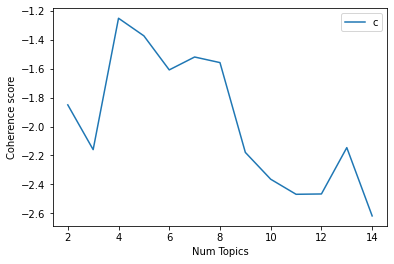

In [15]:
# Show graph
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -1.8506
Num Topics = 3  has Coherence Value of -2.1597
Num Topics = 4  has Coherence Value of -1.2525
Num Topics = 5  has Coherence Value of -1.3741
Num Topics = 6  has Coherence Value of -1.6092
Num Topics = 7  has Coherence Value of -1.5201
Num Topics = 8  has Coherence Value of -1.5588
Num Topics = 9  has Coherence Value of -2.1789
Num Topics = 10  has Coherence Value of -2.364
Num Topics = 11  has Coherence Value of -2.4681
Num Topics = 12  has Coherence Value of -2.4658
Num Topics = 13  has Coherence Value of -2.1458
Num Topics = 14  has Coherence Value of -2.6174


In [17]:
best_at = coherence_values.index(max(coherence_values)) + 2
print('The peak at k={}, the Coherence Value = {}'. format(best_at, max(coherence_values)))


The peak at k=4, the Coherence Value = -1.252494182666128


In [47]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"the" + 0.016*"electr" + 0.015*"magnet" + 0.014*"current" + 0.012*"A" '
  '+ 0.008*"one" + 0.007*"batteri" + 0.007*"circuit" + 0.007*"It" + '
  '0.007*"resist"'),
 (1,
  '0.016*"state" + 0.014*"u.s." + 0.013*"the" + 0.007*"court" + 0.007*"would" '
  '+ 0.006*"power" + 0.006*"govern" + 0.006*"law" + 0.006*"may" + '
  '0.005*"unit"'),
 (2,
  '0.009*"the" + 0.008*"one" + 0.007*"gener" + 0.006*"would" + 0.006*"may" + '
  '0.006*"It" + 0.005*"law" + 0.005*"case" + 0.005*"but" + 0.004*"natur"'),
 (3,
  '0.013*"one" + 0.012*"boil" + 0.011*"water" + 0.010*"put" + 0.009*"two" + '
  '0.009*"egg" + 0.008*"butter" + 0.008*"sugar" + 0.007*"add" + 0.007*"half"')]


In [48]:
corpus_opt = optimal_model[corpus]

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [51]:
optimal_model.save('lda7b_4')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [54]:
##fill value 0 in vector
X = np.zeros(shape=(1400,4))
for i, row in enumerate(optimal_model[corpus]):
  for  j, (topic_num, prop_topic) in enumerate(row):
    X[i, topic_num] = prop_topic



In [55]:
print(X)

[[0.         0.         0.99924773 0.        ]
 [0.         0.06091032 0.93868089 0.        ]
 [0.         0.99915099 0.         0.        ]
 ...
 [0.         0.         0.         0.99902564]
 [0.         0.         0.         0.99902564]
 [0.         0.         0.         0.99902564]]


In [56]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    return(sent_topics_df)



In [57]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9992,"the, one, gener, would, may, It, law, case, bu...","[act, known, circumst, harm, may, accept, gene..."
1,1,2.0,0.9387,"the, one, gener, would, may, It, law, case, bu...","[aris, whether, represent, part, contract, If,..."
2,2,1.0,0.9992,"state, u.s., the, court, would, power, govern,...","[section, cite, godbolt, see, F., N., B, G, fi..."
3,3,1.0,0.8461,"state, u.s., the, court, would, power, govern,...","[row, bell, c.c, see, treasur, hidden, anoth, ..."
4,4,2.0,0.8211,"the, one, gener, would, may, It, law, case, bu...","[give, trespass, pretti, nearli, thing, action..."
5,5,2.0,0.7356,"the, one, gener, would, may, It, law, case, bu...","[condit, true, effect, upon, promis, attach, w..."
6,6,2.0,0.9992,"the, one, gener, would, may, It, law, case, bu...","[land, think, intend, act, consequ, complain, ..."
7,7,2.0,0.9992,"the, one, gener, would, may, It, law, case, bu...","[the, law, wait, properti, use, destroy, hand,..."
8,8,2.0,0.7732,"the, one, gener, would, may, It, law, case, bu...","[for, said, far, one, term, contract, thing, p..."
9,9,2.0,0.6077,"the, one, gener, would, may, It, law, case, bu...","[crime, malum, se, If, gener, ground, punish, ..."


In [58]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.120594 -0.048965       1        1  39.827356
1     -0.128497 -0.106699       2        1  30.406841
3      0.272758 -0.053745       3        1  14.946497
0     -0.023667  0.209409       4        1  14.819306, topic_info=         Term         Freq        Total Category  logprob  loglift
4183     u.s.   899.000000   899.000000  Default  30.0000  30.0000
167     state  1093.000000  1093.000000  Default  29.0000  29.0000
4705   electr   518.000000   518.000000  Default  28.0000  28.0000
8737   magnet   478.000000   478.000000  Default  27.0000  27.0000
4142  current   443.000000   443.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
186        In   149.179682   660.240942   Topic4  -5.3405   0.4218
414       two   146.974766   874.063266   Topic4  -5.3554   0.1263
3364     unit   124.607150   483.737091   Topic4  -5.5205   0.5529
69        may   134.628751  1086.533132   Topic4  -5.4431  -0.1790
255       see    96.874949   318.108702   Topic4  -5.7722   0.7203

[298 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
418        1  0.165371      A
418        2  0.221985      A
418        3  0.077471      A
418        4  0.533359      A
106        1  0.535336      I
...      ...       ...    ...
336        2  0.422992  would
336        3  0.009043  would
336        4  0.038180  would
12023      3  0.988668   yolk
10334      4  0.978316   zinc

[573 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [59]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

corpus_sparse = corpus2csc(corpus)

kmeans_pred = kmeans.fit_predict(corpus_sparse.T)

In [60]:
kmeans_pred.shape

(1400,)

In [61]:
pred_map = dict()
k = 4

for i in range(0, 7):
    count = np.bincount(kmeans_pred[i * 200 : i * 200 + 200])
    np.ndarray.resize(count, (1,k))
    count = count[0]
    index = np.where(count == max(count))[0][0]
    label = chr(ord('a')+i)
    pred_map[index] = label
    print(label + ":" + np.array2string(count) + "\t" + label + " mapped to " + str(index))

a:[  0 200   0   0]	a mapped to 1
b:[ 43 157   0   0]	b mapped to 1
c:[  0 200   0   0]	c mapped to 1
d:[  0 200   0   0]	d mapped to 1
e:[  0   5   0 195]	e mapped to 3
f:[  0 200   0   0]	f mapped to 1
g:[  0  18 182   0]	g mapped to 2


In [62]:
url = 'https://drive.google.com/file/d/1NmGTSp5CLiCTPlQgP614TvNNv1TXDewU/view?usp=sharin'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [63]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(df['segment'])

In [64]:
#df = df.loc[400:1400]

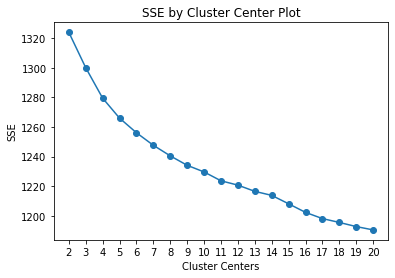

In [65]:
def elbow_method(data, K):
    iters = range(2, K + 1)
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters = k, 
                        init='k-means++', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=0)
                        .fit(data)
                        .inertia_)

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

elbow_method(tfidf, 20)
# Elbow occurs at k=12

In [66]:
from sklearn.metrics import cohen_kappa_score, adjusted_rand_score, silhouette_score
def silhouette_method(data, K):
    iters = range(2, K + 1)
    score = []
    for k in iters:
        model = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        cluster_labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =" + str(k) + "The average silhouette_score is :" + str(silhouette_avg))

silhouette_method(tfidf, 10)

For n_clusters =2The average silhouette_score is :0.018624893621043387
For n_clusters =3The average silhouette_score is :0.023156710927125894
For n_clusters =4The average silhouette_score is :0.027138752576780882
For n_clusters =5The average silhouette_score is :0.031030597194079048
For n_clusters =6The average silhouette_score is :0.03368735467635034
For n_clusters =7The average silhouette_score is :0.0357619829608126
For n_clusters =8The average silhouette_score is :0.031190063730960144
For n_clusters =9The average silhouette_score is :0.02909391237529417
For n_clusters =10The average silhouette_score is :0.0298727211859578


In [79]:
k = 7
tfidf_kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0)
tfidf_kmeans_pred = tfidf_kmeans.fit_predict(tfidf)

In [80]:
for i in range(0, 7):
    a = tfidf_vec.transform(df['segment'][i * 200 : i * 200 + 199])
    count = np.bincount(tfidf_kmeans.predict(a))
    np.ndarray.resize(count, (1,k))
    count = count[0]
    index = np.where(count == max(count))[0][0]
    label = chr(ord('c')+i)
    pred_map[index] = label
    print(label + ":" + np.array2string(count) + "\t" + label + " mapped to " + str(index))

mapped_pred = []
for ele in tfidf_kmeans_pred:
    mapped_pred.append(pred_map[ele])
mapped_pred = np.asarray(mapped_pred) # predicted label

c:[  0   0   0   0 198   1   0]	c mapped to 4
d:[  0 195   0   0   1   3   0]	d mapped to 1
e:[  0   1   0   0   1 197   0]	e mapped to 5
f:[199   0   0   0   0   0   0]	f mapped to 0
g:[  0   0 199   0   0   0   0]	g mapped to 2
h:[  0   0   0   0   0   3 196]	h mapped to 6
i:[  2   0   0 194   2   1   0]	i mapped to 3


In [81]:
df_dominant_topic['klabel'] = tfidf_kmeans_pred

In [82]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,klabel
0,0,2.0,0.9992,"the, one, gener, would, may, It, law, case, bu...","[act, known, circumst, harm, may, accept, gene...",4
1,1,2.0,0.9387,"the, one, gener, would, may, It, law, case, bu...","[aris, whether, represent, part, contract, If,...",4
2,2,1.0,0.9992,"state, u.s., the, court, would, power, govern,...","[section, cite, godbolt, see, F., N., B, G, fi...",4
3,3,1.0,0.8461,"state, u.s., the, court, would, power, govern,...","[row, bell, c.c, see, treasur, hidden, anoth, ...",4
4,4,2.0,0.8211,"the, one, gener, would, may, It, law, case, bu...","[give, trespass, pretti, nearli, thing, action...",4
...,...,...,...,...,...,...
1395,1395,3.0,0.9990,"one, boil, water, put, two, egg, butter, sugar...","[lamb, chop, fri, tomato, potato, la, crãªme, ...",3
1396,1396,3.0,0.8521,"one, boil, water, put, two, egg, butter, sugar...","[glass, rhine, wine, IV, glass, water, V, glas...",3
1397,1397,3.0,0.9990,"one, boil, water, put, two, egg, butter, sugar...","[cover, cloth, set, away, cool, place, hour, d...",3
1398,1398,3.0,0.9990,"one, boil, water, put, two, egg, butter, sugar...","[transpar, veil, egg, cook, white, firm, lift,...",3


In [83]:
df_dominant_topic.groupby(['klabel'])['Dominant_Topic'].value_counts(ascending=False, normalize=True)

klabel  Dominant_Topic
0       2.0               0.975248
        3.0               0.014851
        0.0               0.009901
1       1.0               0.994924
        2.0               0.005076
2       0.0               0.995000
        2.0               0.005000
3       3.0               1.000000
4       2.0               0.832512
        1.0               0.142857
        3.0               0.019704
        0.0               0.004926
5       1.0               0.966019
        2.0               0.029126
        3.0               0.004854
6       2.0               1.000000
Name: Dominant_Topic, dtype: float64